In [1]:
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook
from scipy.optimize import curve_fit
from scipy.stats import norm

In [2]:
path = "/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Mac/2023_Fall/MMAE 419/6.Fatigue/Fatigue Testing - BB Data.xlsx"
wb = load_workbook(path)
save_dir = '/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Mac/2023_Fall/MMAE 419/6.Fatigue/figures/'

In [3]:
def calculate_confidence_interval(data, sample_mean, std_dev):

    margin_of_error = std_dev * (1.96 /np.sqrt(len(data)))  # 1.96 corresponds to z-value for 95% confidence level
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return lower_bound, upper_bound

In [4]:
def eq1(x,A,B):
    return A*x**B

def eq2(x,C,D):
    return C + D * np.log10(x)

Endurance Limit = 49.88068151582566, # of cycle = 10^7
Eq.1 - A : 139.06369918060503, B : -0.06361162844676099
Eq.2 - C : 119.7768690921037, D : -10.541585984350634
Average : 48596.57142857143, Std : 19389.89984396989
95% Confidence Interval: (40303.374278328345, 56889.76857881451)
0.39899728054827277


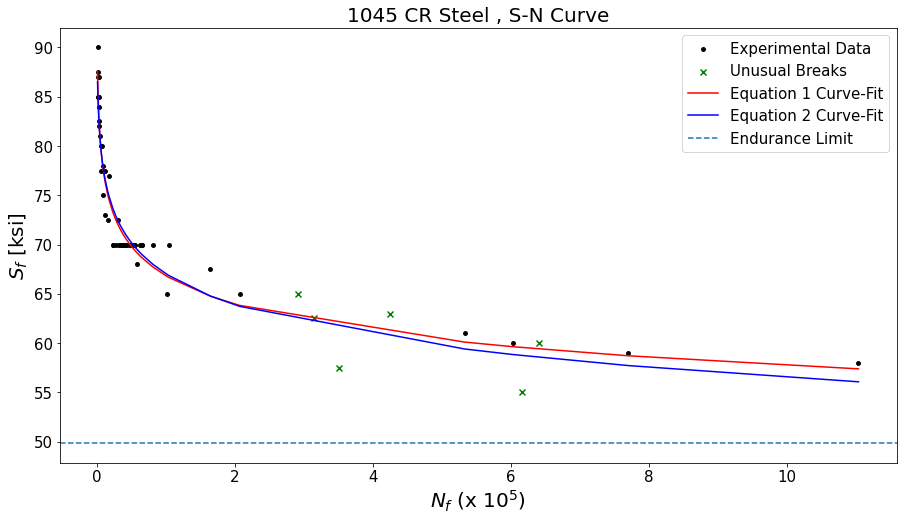

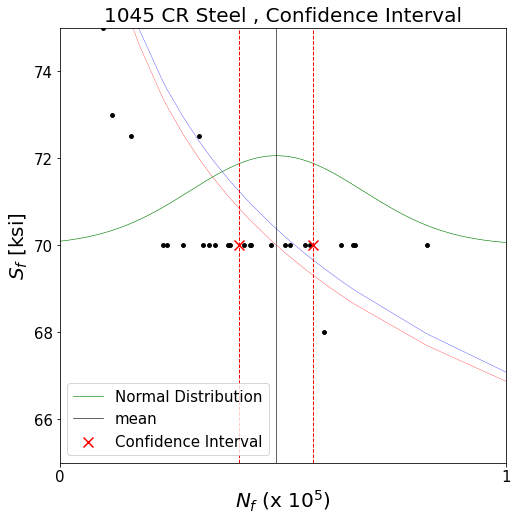

In [14]:
name = '1045 steel'
ws = wb[name]

Sf_ori = np.array([ws.cell(i, 2).value for i in range(4, ws.max_row)])
Nf_ori = np.array([ws.cell(i, 3).value for i in range(4, ws.max_row)])
comment = np.array([ws.cell(i, 4).value for i in range(4, ws.max_row)])

valid_idx = np.where(comment == None)
out_idx = np.where(comment != None)

Sf = Sf_ori[valid_idx]; Nf = Nf_ori[valid_idx]

plt.figure(figsize = (15,8))

plt.title("1045 CR Steel , S-N Curve", fontsize = 20)

plt.scatter(Nf, Sf, c = 'black', s = 15, label = 'Experimental Data')
plt.scatter(Nf_ori[out_idx], Sf_ori[out_idx], marker = 'x', c = 'green', label = 'Unusual Breaks')

pars, _ = curve_fit(eq1, xdata = Nf, ydata = Sf)
pars2, _ = curve_fit(eq2, xdata = Nf, ydata = Sf)

plt.plot(Nf, eq1(Nf, pars[0], pars[1]), c = 'r', label = 'Equation 1 Curve-Fit')
plt.plot(Nf, eq2(Nf, pars2[0], pars2[1]), c = 'b', label = 'Equation 2 Curve-Fit')

# Finding Endurance Limit

y = eq1(10**7, pars[0], pars[1])
plt.axhline(y, linestyle = 'dashed',label = 'Endurance Limit')
print("Endurance Limit = {}, # of cycle = 10^7".format(y))

plt.xlabel("$N_f$ (x $10^5$)", fontsize = 20)
plt.ylabel("$S_f$ [ksi]", fontsize = 20)
plt.xticks(np.arange(0,11,2) * 10**5, [0,2,4,6,8,10], fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

plt.savefig(save_dir + name)

print("Eq.1 - A : {}, B : {}".format(pars[0], pars[1]))
print("Eq.2 - C : {}, D : {}".format(pars2[0], pars2[1]))

print('='*50)

# For 70 ksi, discuss the average fatigue life, standard deviation 
# and how these values must be interpreted by an engineer.
# Also determine a range for fatigue life within which fatigue failure is expected to occur with 95% confidence

Nf_seventy = Nf[np.where(Sf == 70.)]

mean = np.mean(Nf_seventy)
std = np.std(Nf_seventy)

print("Average : {}, Std : {}".format(mean, std))
confidence_interval = calculate_confidence_interval(Nf_seventy, mean, std)

print("95% Confidence Interval:", confidence_interval)

plt.figure(figsize = (8,8))

plt.title("1045 CR Steel , Confidence Interval", fontsize = 20)

plt.scatter(Nf, Sf, c = 'black', s = 15)

pars, _ = curve_fit(eq1, xdata = Nf, ydata = Sf)
pars2, _ = curve_fit(eq2, xdata = Nf, ydata = Sf)

plt.plot(Nf, eq1(Nf, pars[0], pars[1]), c = 'r', linewidth = 0.3)
plt.plot(Nf, eq2(Nf, pars2[0], pars2[1]), c = 'b', linewidth = 0.3)


x = np.linspace(mean - 4*std, mean + 4*std, 1000)
y = norm.pdf(x, mean, std)*10**5 + 70

plt.plot(x, y, c = 'green', linewidth=0.6, label = 'Normal Distribution')
plt.axvline(mean, c = 'black', linewidth = 0.6, label = 'mean')
plt.axvline(confidence_interval[0], c = 'red', linewidth = 1, linestyle = 'dashed')
plt.axvline(confidence_interval[1], c = 'red', linewidth = 1, linestyle = 'dashed')

plt.scatter(confidence_interval, [70,70], marker = 'x', c = 'r', s = 100, label = 'Confidence Interval')


# num_ticks = 4  # You can adjust the number of ticks as needed
# xtick_positions = np.linspace(1000, 10**6, num_ticks)
# xtick_labels = ['$10^3$', '$10^4$', '$10^5$', '$10^6$']

plt.xlabel("$N_f$ (x $10^5$)", fontsize = 20)
plt.ylabel("$S_f$ [ksi]", fontsize = 20)
plt.xticks(np.arange(0,2,1) * 10**5, [0,1], fontsize = 15)
plt.xlim(0, 1*10**5)
plt.ylim(65,75)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15, loc = 'lower left')

plt.savefig(save_dir + name + "confidence")

print(std/mean)

Eq.1 - A : 220.59638583633625, B : -0.1520083628702369
Eq.2 - C : 124.74707740505275, D : -17.477203780577398
Average : 18895.678571428572, Std : 5322.643751353883
95% Confidence Interval: (16924.14373574217, 20867.213407114974)
0.2816857691155928


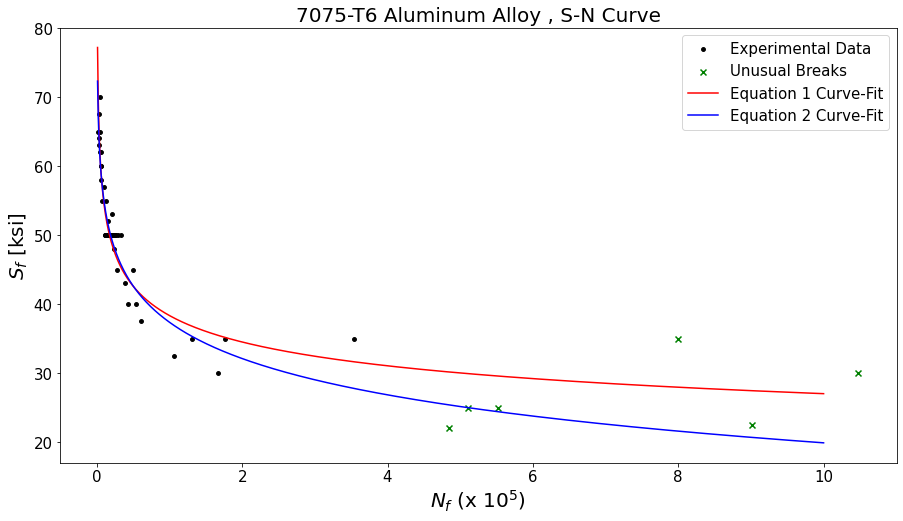

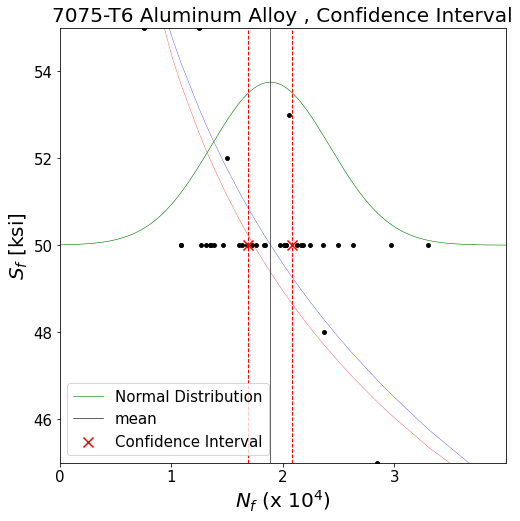

In [15]:
name = '7075 Al'
ws = wb[name]

Sf_ori = np.array([ws.cell(i, 2).value for i in range(4, ws.max_row)])
Nf_ori = np.array([ws.cell(i, 3).value for i in range(4, ws.max_row)])
comment = np.array([ws.cell(i, 4).value for i in range(4, ws.max_row)])

valid_idx = np.where(comment == None)
out_idx = np.where(comment != None)

Sf = Sf_ori[valid_idx]; Nf = Nf_ori[valid_idx]

plt.figure(figsize = (15,8))

plt.title("7075-T6 Aluminum Alloy , S-N Curve", fontsize = 20)

plt.scatter(Nf, Sf, c = 'black', s = 15, label = 'Experimental Data')
plt.scatter(Nf_ori[out_idx], Sf_ori[out_idx], marker = 'x', c = 'green', label = 'Unusual Breaks')

pars, _ = curve_fit(eq1, xdata = Nf, ydata = Sf)
pars2, _ = curve_fit(eq2, xdata = Nf, ydata = Sf)

x = np.linspace(1000,10**6,1000)

plt.plot(x, eq1(x, pars[0], pars[1]), c = 'r', label = 'Equation 1 Curve-Fit')
plt.plot(x, eq2(x, pars2[0], pars2[1]), c = 'b', label = 'Equation 2 Curve-Fit')

# num_ticks = 4  # You can adjust the number of ticks as needed
# xtick_positions = np.linspace(1000, 10**6, num_ticks)
# xtick_labels = ['$10^3$', '$10^4$', '$10^5$', '$10^6$']

plt.xlabel("$N_f$ (x $10^5$)", fontsize = 20)
plt.ylabel("$S_f$ [ksi]", fontsize = 20)
plt.xticks(np.arange(0,11,2) * 10**5, [0,2,4,6,8,10], fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

plt.savefig(save_dir + name)

print("Eq.1 - A : {}, B : {}".format(pars[0], pars[1]))
print("Eq.2 - C : {}, D : {}".format(pars2[0], pars2[1]))

print('='*50)

# For 70 ksi, discuss the average fatigue life, standard deviation 
# and how these values must be interpreted by an engineer.
# Also determine a range for fatigue life within which fatigue failure is expected to occur with 95% confidence

Nf_seventy = Nf[np.where(Sf == 50.)]

mean = np.mean(Nf_seventy)
std = np.std(Nf_seventy)

print("Average : {}, Std : {}".format(mean, std))
confidence_interval = calculate_confidence_interval(Nf_seventy, mean, std)

print("95% Confidence Interval:", confidence_interval)

plt.figure(figsize = (8,8))

plt.title("7075-T6 Aluminum Alloy , Confidence Interval", fontsize = 20)

plt.scatter(Nf, Sf, c = 'black', s = 15)

pars, _ = curve_fit(eq1, xdata = Nf, ydata = Sf)
pars2, _ = curve_fit(eq2, xdata = Nf, ydata = Sf)

plt.plot(Nf, eq1(Nf, pars[0], pars[1]), c = 'r', linewidth = 0.3)
plt.plot(Nf, eq2(Nf, pars2[0], pars2[1]), c = 'b', linewidth = 0.3)


x = np.linspace(mean - 4*std, mean + 4*std, 1000)
y = norm.pdf(x, mean, std)*5*10**4 + 50

plt.plot(x, y, c = 'green', linewidth=0.6, label = 'Normal Distribution')
plt.axvline(mean, c = 'black', linewidth = 0.6, label = 'mean')
plt.axvline(confidence_interval[0], c = 'red', linewidth = 1, linestyle = 'dashed')
plt.axvline(confidence_interval[1], c = 'red', linewidth = 1, linestyle = 'dashed')

plt.scatter(confidence_interval, [50,50], marker = 'x', c = 'r', s = 100, label = 'Confidence Interval')


plt.xlabel("$N_f$ (x $10^4$)", fontsize = 20)
plt.ylabel("$S_f$ [ksi]", fontsize = 20)
plt.xticks(np.arange(4) * 10**4, np.arange(4), fontsize = 15)
plt.xlim(0, 4*10**4)
plt.ylim(45,55)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15, loc = 'lower left')

plt.savefig(save_dir + name + "confidence")
print(std/mean)